# WeatherPy

In [51]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [52]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to an our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

594

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [53]:
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'
query_url = f'{url}appid={weather_api_key}&units={units}&q='
counter = 1

citycity = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

weather_response = requests.get(query_url + city)
weather_json = weather_response.json()

print('********************************')
print('City Number and Name Information')
print('********************************')

for city in cities:
    try:
        weather_response = requests.get(query_url + city).json()
        citycity.append(weather_response['name'])
        lat.append(weather_response['coord']['lat'])
        lng.append(weather_response['coord']['lon'])
        max_temp.append(weather_response['main']['temp_max'])
        humidity.append(weather_response['main']['humidity'])
        cloudiness.append(weather_response['clouds']['all'])
        wind_speed.append(weather_response['wind']['speed'])
        country.append(weather_response['sys']['country'])
        date.append(weather_response['dt'])
        print(f'City Number - {counter} | City Name - {city}')
        counter = counter + 1
    except KeyError:
        print('City Not Found')

 | City Name - punta arenas
City Number - 75 | City Name - victoria
City Number - 76 | City Name - ribas do rio pardo
City Number - 77 | City Name - vostok
City Number - 78 | City Name - oksovskiy
City Number - 79 | City Name - longyearbyen
City Not Found
City Number - 80 | City Name - chuy
City Number - 81 | City Name - mandurah
City Number - 82 | City Name - verkhnevilyuysk
City Number - 83 | City Name - sao filipe
City Number - 84 | City Name - torbay
City Not Found
City Number - 85 | City Name - saskylakh
City Number - 86 | City Name - laibin
City Number - 87 | City Name - tessalit
City Number - 88 | City Name - yellowknife
City Number - 89 | City Name - gayny
City Number - 90 | City Name - bonthe
City Number - 91 | City Name - sibolga
City Not Found
City Number - 92 | City Name - egvekinot
City Number - 93 | City Name - bethel
City Not Found
City Number - 94 | City Name - georgetown
City Number - 95 | City Name - katsuura
City Number - 96 | City Name - san quintin
City Number - 97

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [54]:
city_df = pd.DataFrame({
    'City': citycity,
    'Latitude': lat,
    'Longitude': lng,
    'Maximum Temperature': max_temp,
    'Humidity': humidity,
    'Cloudiness': cloudiness,
    'Wind Speed': wind_speed,
    'Country': country,
    'Date': pd.to_datetime(date, unit="s")
    })
city_df.head()

,City,Latitude,Longitude,Maximum Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Morondava,-20.2833,44.2833,78.21,86,100,14.88,MG,2021-02-10 16:55:38
1,Haines Junction,60.7522,-137.5108,-43.60,66,17,1.14,CA,2021-02-10 16:55:27
2,Point Pleasant,40.0832,-74.0682,34.00,51,1,8.05,US,2021-02-10 16:59:49
3,Mataura,-46.1927,168.8643,49.26,92,100,13.76,NZ,2021-02-10 16:55:06
4,Caravelas,-17.7125,-39.2481,85.57,55,0,9.89,BR,2021-02-10 16:55:28


In [55]:
city_df.to_csv('Cities Compiled.csv')

In [56]:
# Inspect the data and remove the cities where the humidity > 100%.
humidity_over100 = city_df['Humidity'] > 100
humidity_over100.value_counts()
# No Cities over 100% Humidity - All Columns Returned False

False    544
Name: Humidity, dtype: int64

In [57]:
# Defined variables for useful information to plot
lats = city_df['Latitude']
temps = city_df['Maximum Temperature']
hums = city_df['Humidity']
clouds = city_df['Cloudiness']
winds = city_df['Wind Speed']

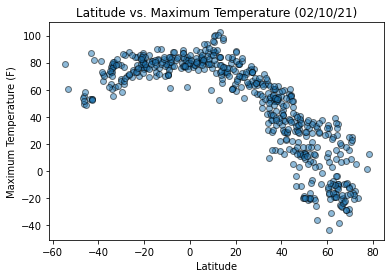

In [58]:
# Latitude vs. Temperature Plot
plt.scatter(lats, temps, edgecolor='black', linewidths=1, marker='o', alpha=.5)
plt.title("Latitude vs. Maximum Temperature (%s)" % time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (F)')
plt.savefig('graphs/LatitudeMaxTempScatterPlot.png')

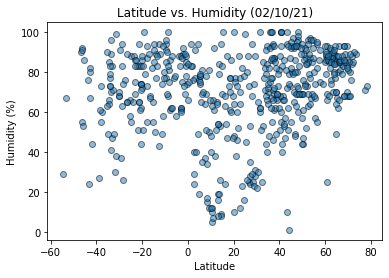

In [59]:
plt.scatter(lats, hums, edgecolor='black', linewidths=1, marker='o', alpha=.5)
plt.title("Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('graphs/LatitudeHumidityScatterPlot.png')

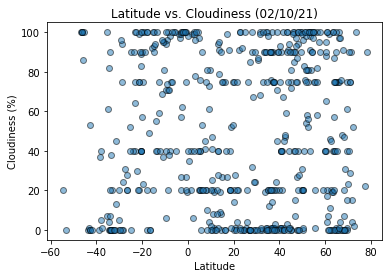

In [60]:
plt.scatter(lats, clouds, edgecolor='black', linewidths=1, marker='o', alpha=.5)
plt.title("Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('graphs/LatitudeCloudinessScatterPlot.png')

## Latitude vs. Wind Speed Plot

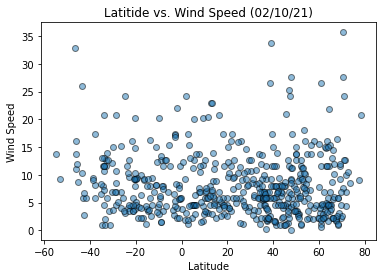

In [72]:
plt.scatter(lats, winds, edgecolor='black', linewidths=1, marker='o', alpha=.5)
plt.title("Latitide vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig('graphs/LatitudeWindSpeedScatterPlot.png')

## Linear Regression

In [96]:
# Create function for calling linear regression on plots
def lin_reg(x_values, y_values, title, text_coordinates):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))

    plt.scatter(x_values, y_values, edgecolor='black', linewidths=1, marker='o', alpha=.5)
    plt.plot(x_values, regress_values, 'r-')
    plt.annotate(line_eq,text_coordinates,fontsize=15,color='black')
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [97]:
# Create Northern and Southern Hemisphere DataFrames
n_hemi_df = city_df[city_df['Latitude'] >= 0]
s_hemi_df = city_df[city_df['Latitude'] <= 0]

The r-value is: 0.7794878921802636


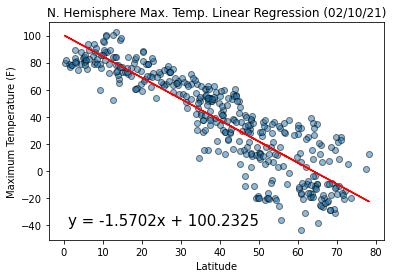

<Figure size 432x288 with 0 Axes>

In [99]:
x_values = n_hemi_df['Latitude']
y_values = n_hemi_df['Maximum Temperature']
plt.title("N. Hemisphere Max. Temp. Linear Regression (%s)" % time.strftime("%x"))
lin_reg(x_values, y_values, 'Maximum Temperature (F)', (1,-40))
plt.savefig('NorthernMaxTempLatitudeLinearRegression.png')

The r-value is: 0.31103723880194906


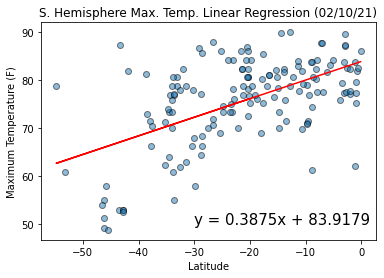

<Figure size 432x288 with 0 Axes>

In [103]:
x_values = s_hemi_df['Latitude']
y_values = s_hemi_df['Maximum Temperature']
plt.title("S. Hemisphere Max. Temp. Linear Regression (%s)" % time.strftime("%x"))
lin_reg(x_values, y_values, 'Maximum Temperature (F)', (-30,50))
plt.savefig('SouthernMaxTempLatitudeLinearRegression.png')

The r-value is: 0.1810403182072067


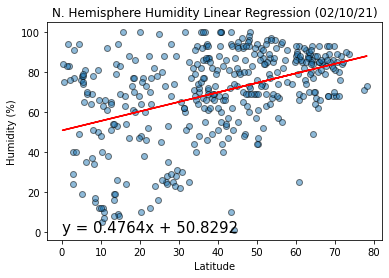

<Figure size 432x288 with 0 Axes>

In [105]:
x_values = n_hemi_df['Latitude']
y_values = n_hemi_df['Humidity']
plt.title("N. Hemisphere Humidity Linear Regression (%s)" % time.strftime("%x"))
lin_reg(x_values, y_values, 'Humidity (%)', (0,0))
plt.savefig('NorthernHumidityLatitudeLinearRegression.png')

The r-value is: 0.07304827573979478


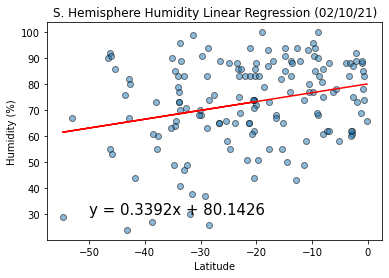

<Figure size 432x288 with 0 Axes>

In [108]:
x_values = s_hemi_df['Latitude']
y_values = s_hemi_df['Humidity']
plt.title("S. Hemisphere Humidity Linear Regression (%s)" % time.strftime("%x"))
lin_reg(x_values, y_values, 'Humidity (%)', (-50,30))
plt.savefig('SouthernHumidityLatitudeLinearRegression.png')

The r-value is: 0.0099883168659568


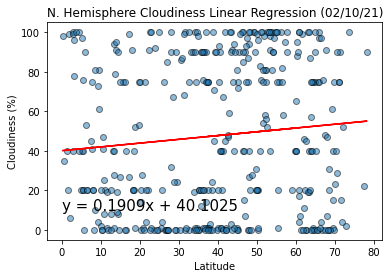

<Figure size 432x288 with 0 Axes>

In [122]:
x_values = n_hemi_df['Latitude']
y_values = n_hemi_df['Cloudiness']
plt.title("N. Hemisphere Cloudiness Linear Regression (%s)" % time.strftime("%x"))
lin_reg(x_values, y_values, 'Cloudiness (%)', (0,10))
plt.savefig('NorthernCloudinessLatitudeLinearRegression.png')

The r-value is: 0.1543443973091864


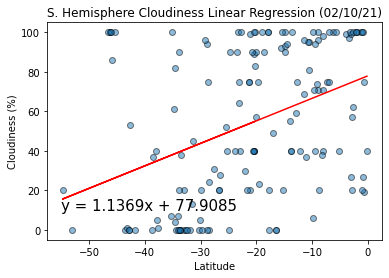

<Figure size 432x288 with 0 Axes>

In [123]:
x_values = s_hemi_df['Latitude']
y_values = s_hemi_df['Cloudiness']
plt.title("S. Hemisphere Cloudiness Linear Regression (%s)" % time.strftime("%x"))
lin_reg(x_values, y_values, 'Cloudiness (%)', (-55,10))
plt.savefig('SouthernCloudinessLatitudeLinearRegression.png')

The r-value is: 0.00012053591648824135


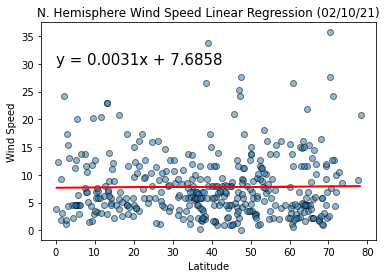

<Figure size 432x288 with 0 Axes>

In [118]:
x_values = n_hemi_df['Latitude']
y_values = n_hemi_df['Wind Speed']
plt.title("N. Hemisphere Wind Speed Linear Regression (%s)" % time.strftime("%x"))
lin_reg(x_values, y_values, 'Wind Speed', (0,30))
plt.savefig('NorthernWindSpeedLatitudeLinearRegression.png')

The r-value is: 0.03702263402499851


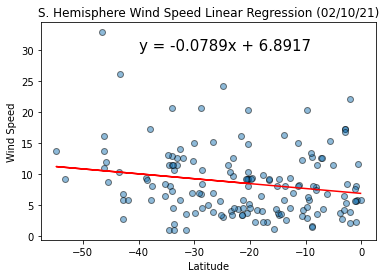

<Figure size 432x288 with 0 Axes>

In [121]:
x_values = s_hemi_df['Latitude']
y_values = s_hemi_df['Wind Speed']
plt.title("S. Hemisphere Wind Speed Linear Regression (%s)" % time.strftime("%x"))
lin_reg(x_values, y_values, 'Wind Speed', (-40,30))
plt.savefig('SouthernWindSpeedLatitudeLinearRegression.png')